CREATE A SCATTER PLOT FOR THE DEMAND (COUNT) AND SALARY DISTRIBUTION FOR DATA ANALYST SKILLS.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 11 21:27:20 2024).


In [4]:
df = df[df['job_title_short'] == 'Data Analyst']

In [ ]:
df_explode = df.explode('job_skills')

df_explode

In [19]:
skills_stat = df_explode.groupby('job_skills').agg(         # grouping by job skills but we want to uae to aggregate functions.
    skills_count = ('job_skills', 'count'),   # create a dictionary-like and name the column, count jobskills
    median_salary = ('salary_year_avg', 'median')  # find the median salary of the salary of the year
)

df_skills_stat = skills_stat.sort_values(by= 'skills_count', ascending= False).head(10)

df_skills_stat

,skills_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


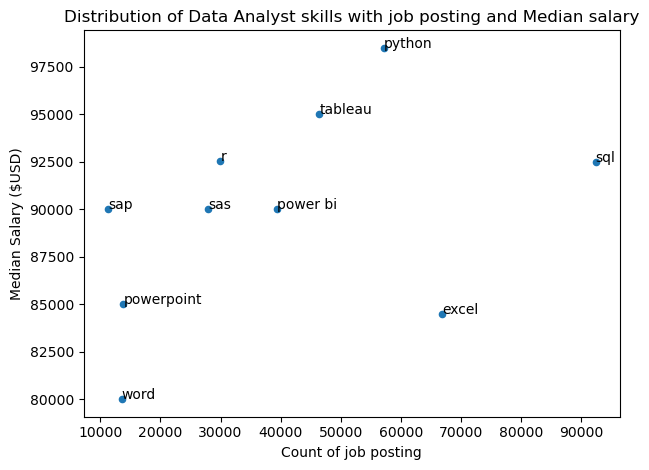

In [28]:
df_skills_stat.plot(kind= 'scatter', x= 'skills_count', y= 'median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median Salary ($USD)')
plt.title ('Distribution of Data Analyst skills with job posting and Median salary')
# for labelling...
for i,txt in enumerate(df_skills_stat.index):
    plt.text(df_skills_stat['skills_count'].iloc[i], df_skills_stat['median_salary'].iloc[i], txt )


plt.tight_layout()